In [90]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
import numpy as np

In [2]:
train=pd.read_csv("haha_2019_train.csv")

In [3]:
train.head()

,id,text,is_humor,votes_no,votes_1,votes_2,votes_3,votes_4,votes_5,funniness_average
0,705196579758583809,Niveles de retraso mental: \r\n\r\n— Bajo.\r\n...,1,1,2,2,0,0,0,1.5
1,678040651817213952,"—Vamos Luke desenfunda tu sable, demuestra tu ...",1,1,3,0,1,0,0,1.5
2,546750892213829633,"- ¿Te ofrezco algo?, ¿Agua, café, mi corazón, ...",1,0,2,1,0,1,1,2.6
3,965807211292364801,No se porqué me hago la cabeza deooos,0,3,0,0,0,0,0,NaN
4,638403841839484928,Quisiera saber que hago durante la siesta de l...,0,4,0,1,0,0,0,NaN


In [4]:
train.set_index("id",inplace=True)

In [5]:
train.fillna(0,inplace=True)

In [7]:
def Countvector(X,y):
    global cv
    cv=CountVectorizer()
    return cv.fit_transform(X)

In [8]:
def Tfidf(X,y):
    global cv
    cv=TfidfVectorizer()
    return cv.fit_transform(X)

In [11]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [44]:
import emoji
sum_char=[]
sum_digits=[]
sum_emojis=[]
 

for j in train["text"].str.findall(r"\W"): 
    char_count=0
    for i in j:
        char_count+=1
    sum_char.append(char_count)
for j in train["text"]:
    spam_digit_count=0
    for i in j:
        if i.isdigit():
            spam_digit_count+=1
    sum_digits.append(spam_digit_count)
for j in train["text"]:
    emoji_count=0
    for i in j:
        if i in emoji.UNICODE_EMOJI:
            emoji_count+=1
    sum_emojis.append(emoji_count)


In [45]:
train["sum_char"]=sum_char
train["sum_digits"]=sum_digits
train["sum_emojis"]=sum_emojis

In [46]:
X=train[["is_humor","sum_char","sum_digits","sum_emojis"]]
y=train["funniness_average"]

In [85]:
def regression_cv(clf,X,y,cv):
    cv_results=cross_validate(clf,X,y,cv=cv)
    sorted(cv_results.keys())                         
    ['fit_time', 'score_time', 'test_score']
    
    print("The test scores for {} fold validation are".format(cv),cv_results['test_score'])
    print("The train scores for {} fold validation are".format(cv),cv_results['train_score'])
    plt.plot(list(range(0,5,1)),cv_results['train_score'],color="red",label="training_score")
    plt.plot(list(range(0,5,1)),cv_results['test_score'],color="green",label="testing_score")
    plt.title("Cross validation result for {}".format(str(clf)[:20]))
    plt.xlabel("CVs")
    plt.ylim(0,1)
    plt.ylabel("Score")
    plt.legend()
    plt.show()

The test scores for 5 fold validation are [0.18777927 0.2135875  0.19460198 0.19406006 0.06941178]
The train scores for 5 fold validation are [0.19685835 0.18711187 0.19337342 0.19526309 0.20300586]


C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


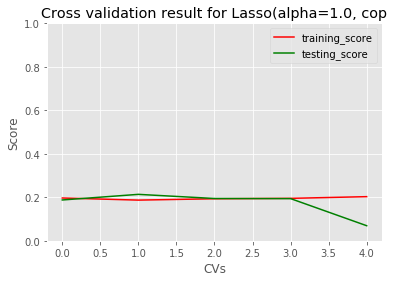

In [86]:
regression_cv(Lasso(),X,y,5)

The test scores for 5 fold validation are [0.86840788 0.87092163 0.86946948 0.86546611 0.81138894]
The train scores for 5 fold validation are [0.85712026 0.85635974 0.85684172 0.85793942 0.86876309]


C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


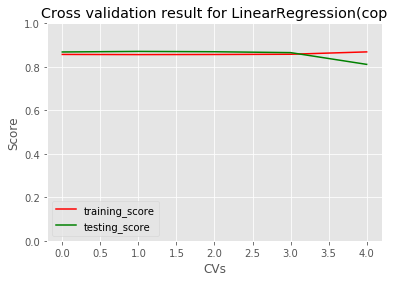

In [87]:
regression_cv(LinearRegression(),X,y,5)

The test scores for 5 fold validation are [0.86840643 0.87091256 0.86947259 0.86546527 0.81139879]
The train scores for 5 fold validation are [0.8571202  0.85635968 0.85684166 0.85793936 0.86876303]


C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


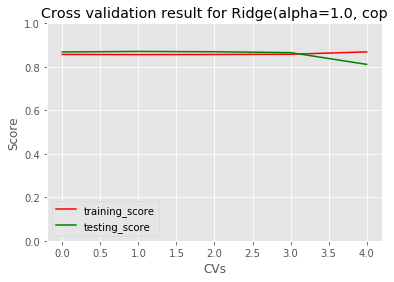

In [88]:
regression_cv(Ridge(),X,y,5)

C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MMOHTASHIM\An

The test scores for 5 fold validation are [0.85345405 0.85061547 0.8484951  0.84559842 0.79940431]
The train scores for 5 fold validation are [0.85315109 0.85225211 0.85351192 0.85412414 0.8639546 ]


C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


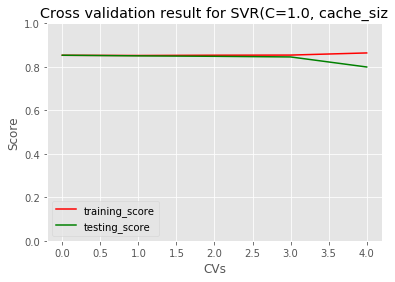

In [89]:
regression_cv(SVR(),X,y,5)

The test scores for 5 fold validation are [0.86815145 0.87037058 0.86895868 0.86580174 0.81148326]
The train scores for 5 fold validation are [0.85913767 0.85844095 0.8588965  0.85986579 0.87069023]


C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


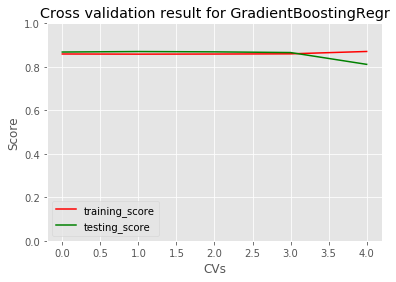

In [91]:
regression_cv(GradientBoostingRegressor(),X,y,5)